In [30]:
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.metrics import mape, mae, ope
from aeml.utils.io import read_pickle

colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


TARGETS_clean  = ['Piperazine C4H10N2', "2-Amino-2-methylpropanol C4H11NO"]

In [6]:
# those were run with during/2 as forecasting horizon 

step_1_target_0 = read_pickle('models/20220311-081020_6_filtered-1-step-target-0-forecasts_quantiles_0.1_0.9.pkl')
step_1_target_1 = read_pickle('models/20220311-081020_6_filtered-1-step-target-1-forecasts_quantiles_0.1_0.9.pkl')

step_30_target_0 = read_pickle('models/20220311-081020_6_filtered-30-step-target-0-forecasts_quantiles_0.1_0.9.pkl')
step_30_target_1 = read_pickle('models/20220311-081020_6_filtered-30-step-target-1-forecasts_quantiles_0.1_0.9.pkl')

step_60_target_0 = read_pickle('models/20220311-081020_6_filtered-60-step-target-0-forecasts_quantiles_0.1_0.9.pkl')
step_60_target_1 = read_pickle('models/20220311-081020_6_filtered-60-step-target-1-forecasts_quantiles_0.1_0.9.pkl')

In [8]:
y_connected = TimeSeries.from_pickle('y_connected.pkl')
y_scaled = TimeSeries.from_pickle('y_scaled')


y_scaled_df = y_scaled.pd_dataframe()

x_conncected = y_scaled_df[TARGETS_clean[0]].index - y_scaled_df[TARGETS_clean[0]].index[0]
x_conncected = [val.total_seconds() / (60 * 60 * 24) for val in x_conncected]


### Make plots

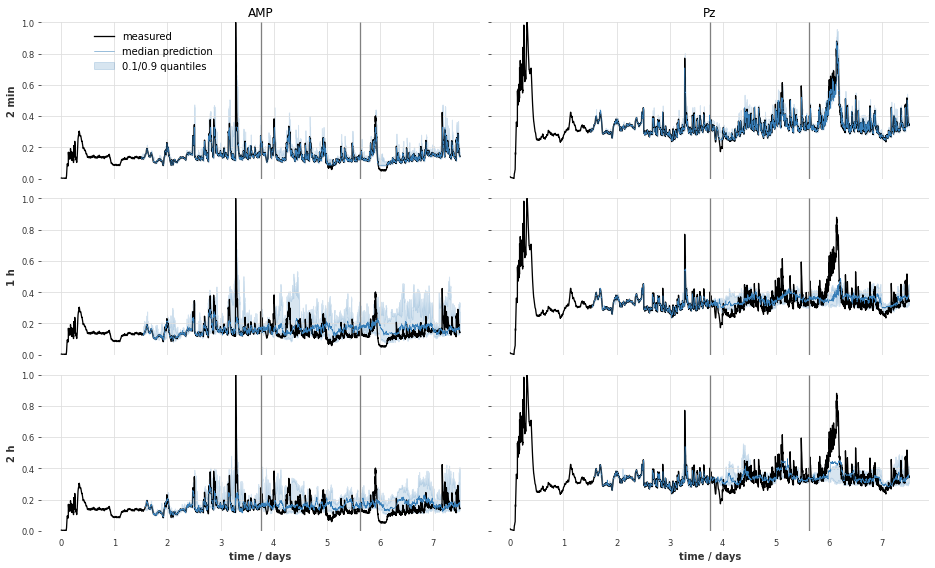

In [9]:
fig, ax = plt.subplots(3,2, figsize=(13.1, 8), sharex='all', sharey='row')

for row in range(3):
    ax[row][0].plot(x_conncected, y_scaled_df[TARGETS_clean[0]], c='k', label='measured')
    ax[row][1].plot(x_conncected, y_scaled_df[TARGETS_clean[1]], c='k')

    for col in range(2):
        ax[row][col].vlines(x_conncected[2704], -0.25,1.0, color='gray')
        ax[row][col].vlines(x_conncected[4056], -0.25,1.0, color='gray')

# 2 min
x_axis = step_1_target_0[0].pd_dataframe()['0'].index - y_scaled_df[TARGETS_clean[0]].index[0]
x = [val.total_seconds() / (60 * 60 * 24) for val in x_axis]
ax[0][1].plot(x, step_1_target_0[1].pd_dataframe()['0'], c=colors[1], lw=.5, label='mean prediction')
ax[0][0].plot(x, step_1_target_1[1].pd_dataframe()['0'], c=colors[1], lw=.5, label='median prediction')


ax[0][1].fill_between(x, step_1_target_0[0].pd_dataframe()['0'], step_1_target_0[2].pd_dataframe()['0'], color=colors[1], alpha=.2)
ax[0][0].fill_between(x, step_1_target_1[0].pd_dataframe()['0'], step_1_target_1[2].pd_dataframe()['0'], color=colors[1], alpha=.2, label='0.1/0.9 quantiles')

ax[0][0].set_ylim(0,1)
ax[0][1].set_ylim(0,1)


# # 1 h
x_axis = step_30_target_0[0].pd_dataframe()['0'].index - y_scaled_df[TARGETS_clean[0]].index[0]
x = [val.total_seconds() / (60 * 60 * 24) for val in x_axis]
ax[1][1].plot(x, step_30_target_0[1].pd_dataframe()['0'], c=colors[1], lw=.5, label='mean prediction')
ax[1][0].plot(x, step_30_target_1[1].pd_dataframe()['0'], c=colors[1], lw=.5)


ax[1][1].fill_between(x, step_30_target_0[0].pd_dataframe()['0'], step_30_target_0[2].pd_dataframe()['0'], color=colors[1], alpha=.2)
ax[1][0].fill_between(x, step_30_target_1[0].pd_dataframe()['0'], step_30_target_1[2].pd_dataframe()['0'], color=colors[1], alpha=.2)

ax[1][0].set_ylim(0,1)
ax[1][1].set_ylim(0,1)



# # 2 h
x_axis = step_60_target_0[0].pd_dataframe()['0'].index - y_scaled_df[TARGETS_clean[0]].index[0]
x = [val.total_seconds() / (60 * 60 * 24) for val in x_axis]
ax[2][1].plot(x, step_60_target_0[1].pd_dataframe()['0'], c=colors[1], lw=.5, label='mean prediction')
ax[2][0].plot(x, step_60_target_1[1].pd_dataframe()['0'], c=colors[1], lw=.5)


ax[2][1].fill_between(x, step_60_target_0[0].pd_dataframe()['0'], step_60_target_0[2].pd_dataframe()['0'], color=colors[1], alpha=.2)
ax[2][0].fill_between(x, step_60_target_1[0].pd_dataframe()['0'], step_60_target_1[2].pd_dataframe()['0'], color=colors[1], alpha=.2)

ax[2][0].set_ylim(0,1)
ax[2][1].set_ylim(0,1)



ax[0][0].set_title('AMP')
ax[0][1].set_title('Pz')

ax[2][0].set_xlabel('time / days')
ax[2][1].set_xlabel('time / days')

ax[0][0].set_ylabel('2 min')
ax[1][0].set_ylabel('1 h')
ax[2][0].set_ylabel('2 h')

fig.tight_layout()

ax[0][0].legend(loc='upper left', bbox_to_anchor=(.1,1))

fig.savefig(f'20220311_forecast_overview.pdf', bbox_inches='tight')

### Compute metrics

In [31]:
def get_metrics(actual, predicted): 
    actual = TimeSeries.from_series(actual)
    predicted = TimeSeries.from_series(predicted)
    mae_score = mae(actual, predicted)
    mape_score = mape(actual, predicted)
    ope_score = ope(actual, predicted)
    return {
        'mae': mae_score,
        'mape': mape_score,
        'ope': ope_score
    }

#### AMP

In [32]:
get_metrics(y_scaled_df[TARGETS_clean[1]][4056:],step_1_target_0[1].pd_dataframe()['0'][4056:])

{'mae': 0.008939960985387737,
 'mape': 2.4368939957216833,
 'ope': 0.37827978394930756}

In [34]:
get_metrics(y_scaled_df[TARGETS_clean[1]][4056:],step_30_target_0[1].pd_dataframe()['0'][4056:])

{'mae': 0.0394073422168147,
 'mape': 11.029698450021334,
 'ope': 0.34473332080028374}

In [35]:
get_metrics(y_scaled_df[TARGETS_clean[1]][4056:],step_60_target_0[1].pd_dataframe()['0'][4056:])

{'mae': 0.03550057382513647,
 'mape': 9.478101733271242,
 'ope': 3.820748410348062}

#### Pz 

In [37]:
get_metrics(y_scaled_df[TARGETS_clean[0]][4056:],step_1_target_1[1].pd_dataframe()['0'][4056:])

{'mae': 0.009471103586712878,
 'mape': 4.235518674101464,
 'ope': 1.9672137804416856}

In [39]:
get_metrics(y_scaled_df[TARGETS_clean[0]][4056:],step_30_target_1[1].pd_dataframe()['0'][4056:])

{'mae': 0.04999564169471071,
 'mape': 23.38424190674555,
 'ope': 17.405593802762066}

In [40]:
get_metrics(y_scaled_df[TARGETS_clean[0]][4056:],step_60_target_1[1].pd_dataframe()['0'][4056:])

{'mae': 0.04041629135027904,
 'mape': 20.868076234780723,
 'ope': 10.372566946028094}